In [18]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [2]:
# When calling the load_dataset from the seaborn library
# it goes to the github repository and looks for that dataset
# the repository is: https://github.com/mwaskom/seaborn-data/tree/master

data_check = sns.load_dataset('penguins')
data_check.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Data cleaning
Clean the dataset by subsetting for specific columns, renaming columns, dropping rows with missing values, and resetting the index. For the purposes of this exercise, we will be focusing on the *body_mass_g, bill_length_mm, sex, and species* columns.

In [3]:
penguin = data_check[['body_mass_g','bill_length_mm','sex','species']]
penguin.head(10)

,body_mass_g,bill_length_mm,sex,species
0,3750.0,39.1,Male,Adelie
1,3800.0,39.5,Female,Adelie
2,3250.0,40.3,Female,Adelie
3,NaN,NaN,NaN,Adelie
4,3450.0,36.7,Female,Adelie
5,3650.0,39.3,Male,Adelie
6,3625.0,38.9,Female,Adelie
7,4675.0,39.2,Male,Adelie
8,3475.0,34.1,NaN,Adelie
9,4250.0,42.0,NaN,Adelie


In [4]:
# First check the number of empty values
penguin.isna().sum()

body_mass_g        2
bill_length_mm     2
sex               11
species            0
dtype: int64

In [5]:
nan_rate = penguin['sex'].isna().sum()/penguin.shape[0]
print(round(nan_rate * 100,3)) # Only 3.2% of the rows have a missing value in the sex attribute, I can drop those values

3.198


In [6]:
# Get the rows that have an empty sex value
sex_missing = penguin['sex'].isna()
penguin[sex_missing]

,body_mass_g,bill_length_mm,sex,species
3,NaN,NaN,NaN,Adelie
8,3475.0,34.1,NaN,Adelie
9,4250.0,42.0,NaN,Adelie
10,3300.0,37.8,NaN,Adelie
11,3700.0,37.8,NaN,Adelie
47,2975.0,37.5,NaN,Adelie
246,4100.0,44.5,NaN,Gentoo
286,4650.0,46.2,NaN,Gentoo
324,4725.0,47.3,NaN,Gentoo
336,4875.0,44.5,NaN,Gentoo


In [7]:
# Dropping nulls across the data sets
penguin = penguin.dropna().reset_index(drop=True)
penguin.head(20)

,body_mass_g,bill_length_mm,sex,species
0,3750.0,39.1,Male,Adelie
1,3800.0,39.5,Female,Adelie
2,3250.0,40.3,Female,Adelie
3,3450.0,36.7,Female,Adelie
4,3650.0,39.3,Male,Adelie
5,3625.0,38.9,Female,Adelie
6,4675.0,39.2,Male,Adelie
7,3200.0,41.1,Female,Adelie
8,3800.0,38.6,Male,Adelie
9,4400.0,34.6,Male,Adelie


## Create holdout sample

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

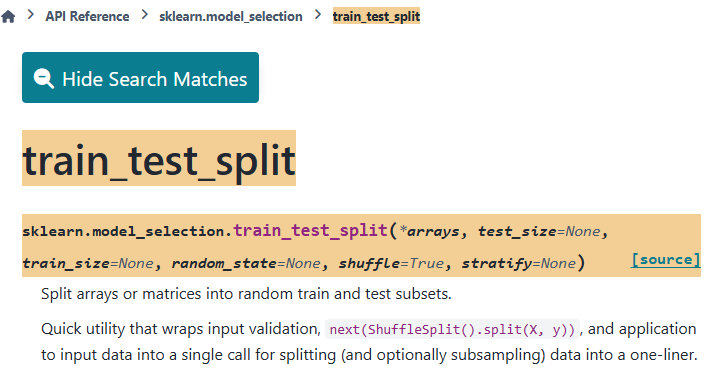

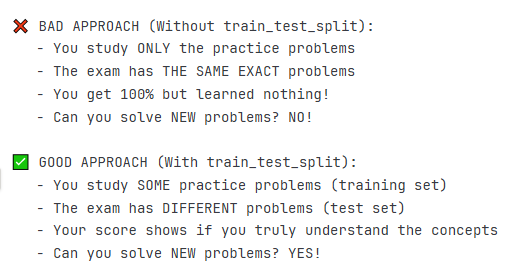

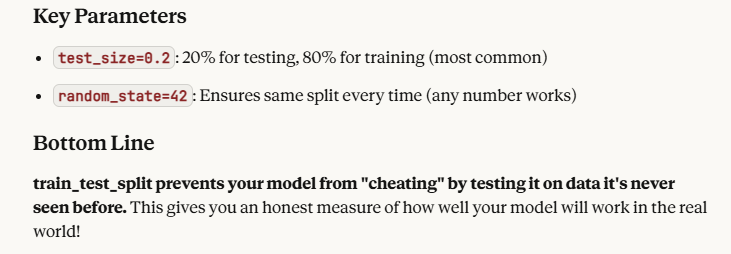

In [8]:
# Separate independet variables (X) from dependent variables (Y)
penguin_x = penguin[['bill_length_mm','sex','species']]
penguin_y = penguin[['body_mass_g']]

x_train, x_test,  y_train , y_test = train_test_split(penguin_x , penguin_y , test_size=0.3,random_state=42) 

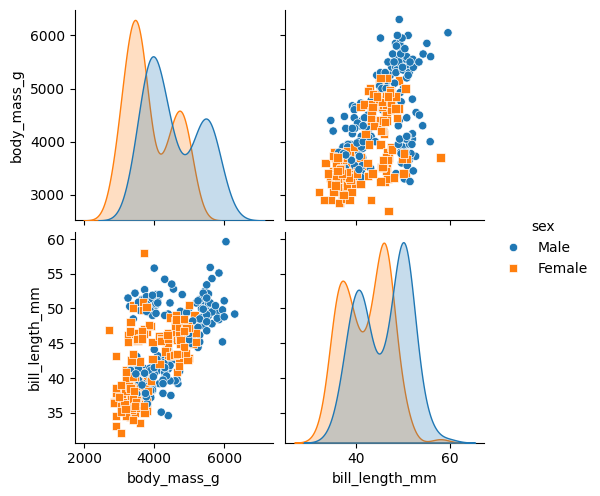

In [9]:
# Check if there is linear relationship between the independet variables and the dependet variable
sns.pairplot(
    data = penguin,
    hue = 'sex', # check linearity with a cateorical variable
    markers = ['o','s']
)

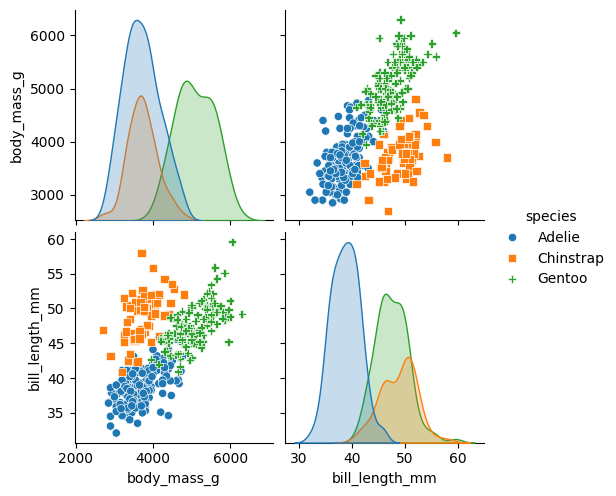

In [10]:
# Check if there is linear relationship between the independet variables and the dependet variable
sns.pairplot(
    data = penguin,
    hue = 'species', # check linearity with a cateorical variable
    markers = ['o','s','P'],
    diag_kind = 'kde'
)

In [11]:
# Create a formula setting the body mass as function of the bill length, the sex and the specie
# using a 'C' to mark the varibable as a categorical attribute

formula = 'body_mass_g ~ bill_length_mm + C(sex) + C(species)'

# Join the data set to train the model 
penguin_train_data = pd.concat([x_train,y_train],axis =1).reset_index(drop=True)
penguin_train_data.head()

,bill_length_mm,sex,species,body_mass_g
0,40.5,Female,Adelie,3200.0
1,48.2,Male,Gentoo,5100.0
2,47.4,Female,Gentoo,4725.0
3,37.6,Female,Adelie,3600.0
4,52.8,Male,Chinstrap,4550.0


In [12]:
# Create the model

penguin_model = ols(formula = formula, data = penguin_train_data).fit()
penguin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           1.31e-92
Time:                        11:17:12   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(sex)[T.Male]            528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## C(gender) - Male
Given the name of the variable, we know that **the variable was encoded as Male = 1, Female = 0.** This means that female penguins are the reference point. If all other variables are constant, then we would expect a male penguin's body mass to be about 528.95 grams more than a female penguin's body mass.

## C(species) - Chinstrap and Gentoo
Given the names of these two variables, we know that Adelie penguins are the reference point. So, if we compare an Adelie penguin and a Chinstrap penguin, who have the same characteristics except their species, we would expect the Chinstrap penguin to have a body mass of about 285.39 grams less than the Adelie penguin. If we compare an Adelie penguin and a Gentoo penguin, who have the same characteristics except their species, we would expect the Gentoo penguin to have a body mass of about 1,081.62 grams more than the Adelie penguin.

## Bill length (mm)
Lastly, bill length (mm) is a continuous variable, so if we compare two penguins who have the same characteristics, except one penguin's bill is 1 millimeter longer, we would expect the penguin with the longer bill to have 35.55 grams more body mass than the penguin with the shorter bill.

*** Analysis of coeficients are from Coursera as part of the https://www.coursera.org/professional-certificates/google-advanced-data-analytics

In [13]:
x_test

,bill_length_mm,sex,species
25,39.5,Female,Adelie
309,46.9,Female,Gentoo
73,42.1,Male,Adelie
195,49.8,Female,Chinstrap
57,41.1,Male,Adelie
...,...,...,...
15,37.8,Female,Adelie
6,39.2,Male,Adelie
209,55.8,Male,Chinstrap
93,43.2,Male,Adelie


In [14]:
y_test

,body_mass_g
25,3250.0
309,4875.0
73,4000.0
195,3675.0
57,4050.0
...,...
15,3400.0
6,4675.0
209,4000.0
93,4100.0


In [15]:
penguin_test = pd.concat([x_test,y_test],axis = 1).reset_index(drop=True)
penguin_test

,bill_length_mm,sex,species,body_mass_g
0,39.5,Female,Adelie,3250.0
1,46.9,Female,Gentoo,4875.0
2,42.1,Male,Adelie,4000.0
3,49.8,Female,Chinstrap,3675.0
4,41.1,Male,Adelie,4050.0
...,...,...,...,...
95,37.8,Female,Adelie,3400.0
96,39.2,Male,Adelie,4675.0
97,55.8,Male,Chinstrap,4000.0
98,43.2,Male,Adelie,4100.0


In [16]:
penguin_test['model_predictions'] = penguin_model.predict(penguin_test[['bill_length_mm','sex','species']])
penguin_test.head(30)

,bill_length_mm,sex,species,body_mass_g,model_predictions
0,39.5,Female,Adelie,3250.0,3436.455443
1,46.9,Female,Gentoo,4875.0,4781.153714
2,42.1,Male,Adelie,4000.0,4057.837531
3,49.8,Female,Chinstrap,3675.0,3517.238973
4,41.1,Male,Adelie,4050.0,4022.287040
5,44.9,Female,Gentoo,4750.0,4710.052734
6,50.7,Male,Gentoo,5550.0,5445.196391
7,49.7,Male,Chinstrap,3600.0,4042.634738
8,49.6,Male,Chinstrap,3775.0,4039.079689
9,51.4,Male,Chinstrap,3950.0,4103.070571


TypeError: Axes.scatter() missing 1 required positional argument: 'y'

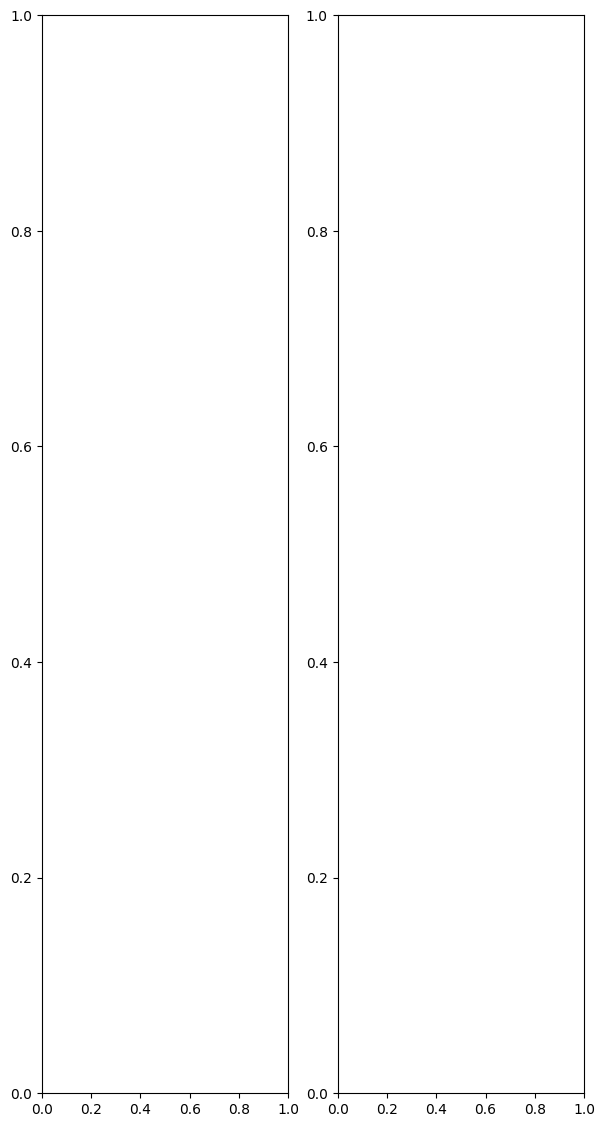

In [20]:
fig, axes = plt.subplots(1,2,figsize=(7,14))

axes[0].scatter(penguin_test['body_mass_g'],alpha=0.6,label='actual Data')
axes[0].scatter(penguin_test['model_predictions'],color='coral',alpha= 0.7,label='Predicted Data')